<a href="https://colab.research.google.com/github/nuriddinovN/trash_detection/blob/main/trash_detection_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>RESEARCH FOR TRASH DETECTION</h1>

Testing **CLIP**

In [1]:
!pip install torch torchvision torchaudio --quiet
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.9 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-kjr3ulih
  Running command git clone --filter=blob:none --

In [2]:
import torch
import clip
from PIL import Image
import requests
from io import BytesIO

device = "cuda" if torch.cuda.is_available() else "cpu"

model, preprocess = clip.load("ViT-B/32", device=device)


100%|███████████████████████████████████████| 338M/338M [00:04<00:00, 74.9MiB/s]


In [3]:
trash_classes = [
    "plastic bottle",
    "plastic bag",
    "cigarette butt",
    "food wrapper",
    "metal can",
    "glass bottle",
    "paper trash",
    "general trash"
]

text_inputs = clip.tokenize(trash_classes).to(device)


In [8]:
url = "https://getrocketbook.com/cdn/shop/articles/paper-waste.jpg?v=1679676585&width=1100"
# Replace with your image URL
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# Preprocess image for CLIP
image_input = preprocess(image).unsqueeze(0).to(device)



from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
    image = Image.open(filename)
    image_input = preprocess(image).unsqueeze(0).to(device)


In [9]:
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

    # Normalize features
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    # Compute similarity
    similarity = (image_features @ text_features.T).squeeze(0)
    values, indices = similarity.softmax(dim=0).topk(3)  # Top 3 matches

print("Top Trash Predictions:")
for value, index in zip(values, indices):
    print(f"{trash_classes[index]}: {value.item()*100:.2f}%")


Top Trash Predictions:
paper trash: 12.90%
food wrapper: 12.84%
plastic bag: 12.81%


Testing **Blip**

In [ ]:
!pip install torch torchvision --quiet
!pip install transformers --quiet
!pip install ftfy regex tqdm


In [11]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
from io import BytesIO
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [12]:
# Example: image from URL
url = "https://getrocketbook.com/cdn/shop/articles/paper-waste.jpg?v=1679676585&width=1100"  # Replace with your image URL
response = requests.get(url)
image = Image.open(BytesIO(response.content)).convert('RGB')

# Or upload manually
# from google.colab import files
# uploaded = files.upload()
# image = Image.open(next(iter(uploaded))).convert('RGB')


In [13]:
inputs = processor(image, return_tensors="pt").to(device)

out = model.generate(**inputs)
caption = processor.decode(out[0], skip_special_tokens=True)

print("Generated Caption:")
print(caption)


Generated Caption:
a bunch of yellow flowers sitting on a table


In [16]:
# Install sentence-transformers if not installed
!pip install sentence-transformers --quiet

from sentence_transformers import SentenceTransformer, util

# Load sentence transformer for similarity
embedder = SentenceTransformer('all-MiniLM-L6-v2', device=device)

# Embed the caption and trash classes
caption_emb = embedder.encode(caption, convert_to_tensor=True)
class_embs = embedder.encode(trash_classes, convert_to_tensor=True)

# Compute cosine similarity
cos_scores = util.cos_sim(caption_emb, class_embs)[0]

# Find best matching trash class
top_results = torch.topk(cos_scores, k=3)

print("\nTop matching trash classes for the caption:")
for score, idx in zip(top_results.values, top_results.indices):
    print(f"{trash_classes[idx]}: {score.item()*100:.2f}%")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


Top matching trash classes for the caption:
glass bottle: 18.82%
paper trash: 16.83%
plastic bottle: 16.75%


tesing **YOLO**

In [18]:
!pip install torch torchvision transformers pillow


Total detectable trash classes: 44
YOLO-World model loaded.
Custom trash classes set.
Running detection on image: /content/paper-waste.webp

image 1/1 /content/paper-waste.webp: 448x640 1 paper bag, 536.4ms
Speed: 4.4ms preprocess, 536.4ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Prediction done.


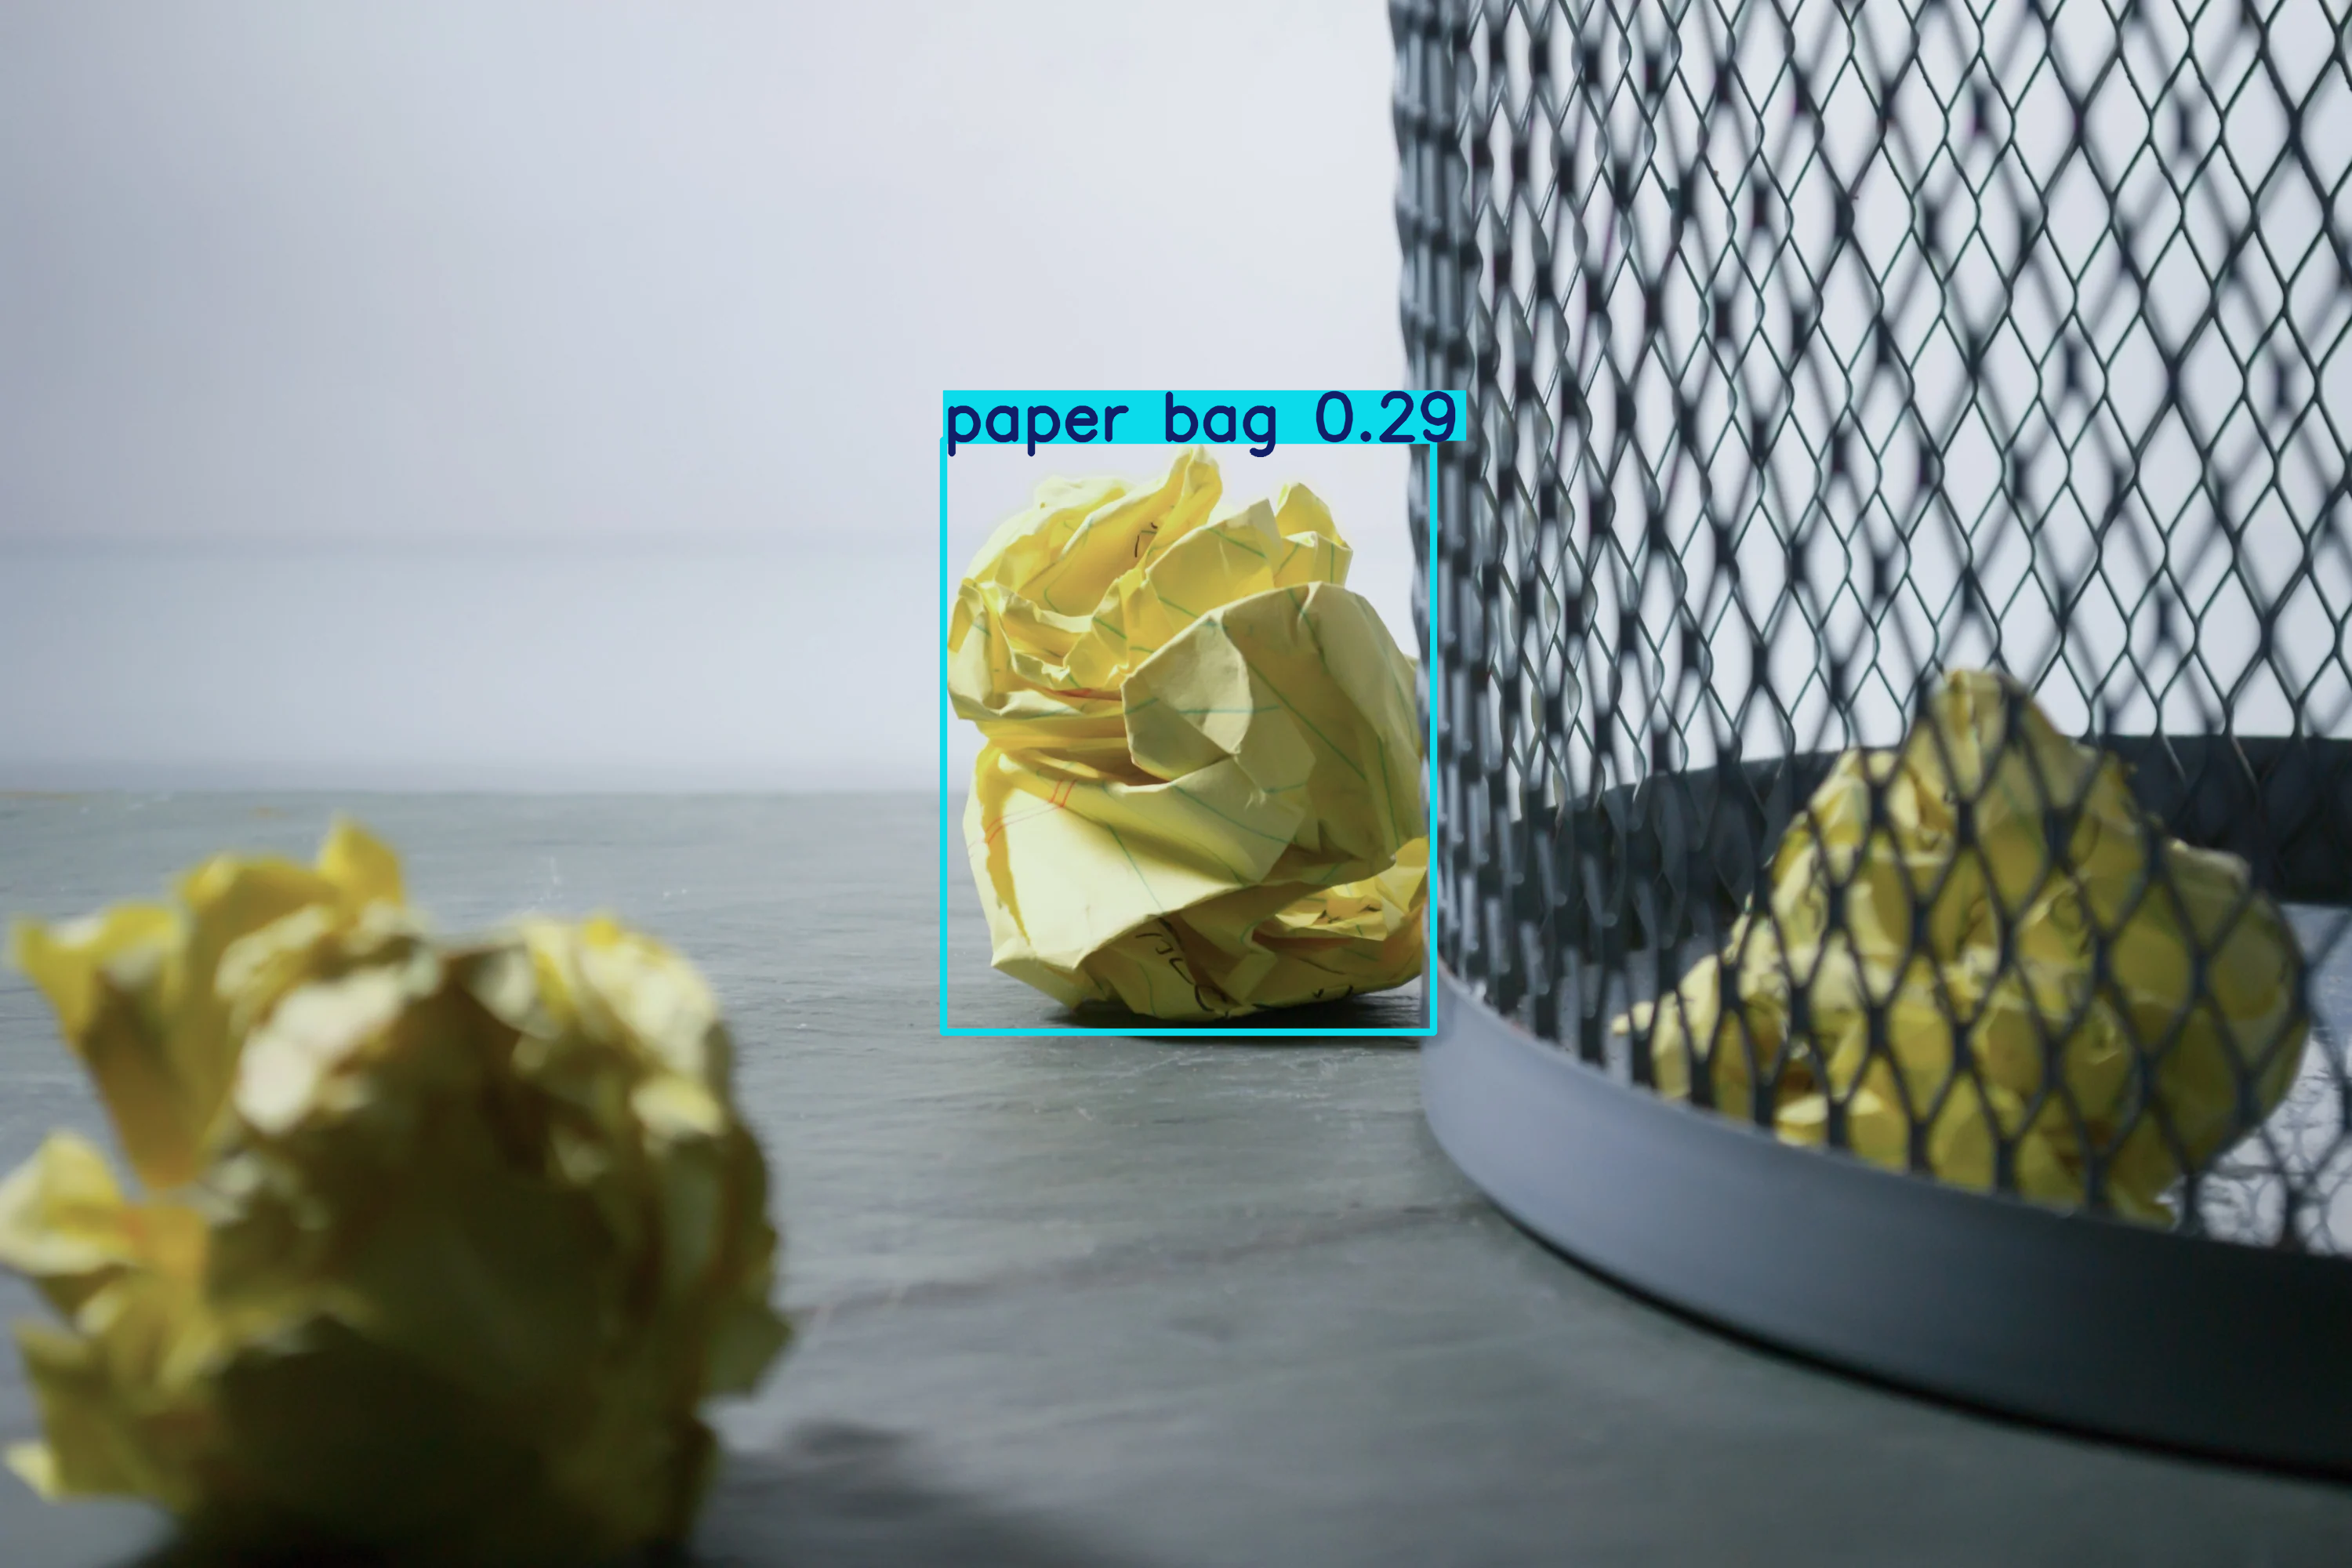


Detected trash objects:
 - paper bag (Confidence: 0.29), Category: Paper

Image classified into categories:
 * Paper


In [21]:
from ultralytics import YOLO
import os

def classify_trash_with_yolo_world(image_path):
    """
    Detects trash objects in an image using YOLO-World and maps detected classes
    to broader trash categories.

    Args:
        image_path (str): Path to the input image.
    """

    # Expanded trash categories with more sub-categories
    trash_categories = {
        "Plastic": [
            "plastic bottle",
            "plastic bag",
            "food wrapper",
            "plastic container",
            "plastic straw",
            "plastic cup",
            "plastic packaging",
            "plastic utensils"
        ],
        "Metal": [
            "metal can",
            "aluminum foil",
            "metal lid",
            "metal bottle cap",
            "tin can"
        ],
        "Glass": [
            "glass bottle",
            "glass jar",
            "broken glass",
            "glass fragments"
        ],
        "Paper": [
            "paper trash",
            "cardboard",
            "newspaper",
            "magazine",
            "paper bag",
            "paper cup",
            "paper packaging"
        ],
        "Tobacco": [
            "cigarette butt",
            "cigar butt",
            "smoking filters"
        ],
        "Organic": [
            "food waste",
            "fruit peel",
            "vegetable scraps",
            "coffee grounds",
            "egg shell"
        ],
        "Textile": [
            "fabric scraps",
            "clothing",
            "rags",
            "cloth pieces",
            "shoes"
        ],
        "Electronic": [
            "battery",
            "small electronics",
            "wires",
            "cables"
        ],
        "General": [
            "general trash",
            "miscellaneous waste",
            "non-recyclable waste"
        ]
    }

    # Flatten all detectable trash classes
    detectable_classes = []
    for subs in trash_categories.values():
        detectable_classes.extend(subs)

    # Map detected class to top-level category
    class_to_category = {}
    for cat, subs in trash_categories.items():
        for sub in subs:
            class_to_category[sub] = cat

    print(f"Total detectable trash classes: {len(detectable_classes)}")

    # Initialize YOLO-World model
    try:
        model = YOLO("/content/yolov8s-world.pt")
        print("YOLO-World model loaded.")
    except Exception as e:
        print(f"Failed to load YOLO-World model: {e}")
        return

    # Set custom classes (limit detection to defined trash classes)
    model.set_classes(detectable_classes)
    print("Custom trash classes set.")

    # Check if image file exists
    if not os.path.isfile(image_path):
        print(f"Image file not found: {image_path}")
        return

    # Run prediction
    print(f"Running detection on image: {image_path}")
    try:
        results = model.predict(image_path, conf=0.25)
        print("Prediction done.")
    except Exception as e:
        print(f"Prediction error: {e}")
        return

    # Process and display results
    if results and len(results) > 0:
        res = results[0]
        res.show()  # Show image with bounding boxes

        detected_categories = set()
        if res.boxes:
            print("\nDetected trash objects:")
            for box in res.boxes:
                cls_id = int(box.cls)
                conf = box.conf.item()
                detected_class = model.names[cls_id]

                top_cat = class_to_category.get(detected_class, "Unknown")
                detected_categories.add(top_cat)

                print(f" - {detected_class} (Confidence: {conf:.2f}), Category: {top_cat}")
        else:
            print("No trash objects detected.")

        if detected_categories:
            print("\nImage classified into categories:")
            for cat in detected_categories:
                print(f" * {cat}")
        else:
            print("No top-level categories identified.")
    else:
        print("No results returned from prediction.")

# Example usage
if __name__ == "__main__":
    image_file = "/content/paper-waste.webp"  # Change this to your image path
    classify_trash_with_yolo_world(image_file)
